In [ ]:
#Random forest is a powerful tree based technique for predictiong stock prices/
#the best ways possible to predict stock predictions using long short term memory for time series forecasting.


In [ ]:
what is stock market?
it is the collectio of markets wheree stocks and other securities are bought
and sold by investors.


In [ ]:
!pip install keras

In [ ]:
!pip install --upgrade tensorflow


In [ ]:
!pip install pydot
!apt-get install graphviz


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestClassifier
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.dates as mandates
from sklearn import linear_model
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
import warnings
warnings.filterwarnings('ignore')


In [ ]:
df=pd.read_csv('/content/MSFT.csv')
print(df)
df.head()

           Date        Open        High         Low       Close   Adj Close  \
0    2021-08-16  293.190002  294.820007  290.019989  294.600006  292.213959   
1    2021-08-17  292.390015  293.429993  291.079987  293.079987  290.706207   
2    2021-08-18  292.040009  294.820007  290.269989  290.730011  288.927338   
3    2021-08-19  288.690002  297.470001  288.640015  296.769989  294.929871   
4    2021-08-20  299.720001  305.839996  298.059998  304.359985  302.472809   
..          ...         ...         ...         ...         ...         ...   
247  2022-08-09  279.640015  283.079987  277.609985  282.299988  282.299988   
248  2022-08-10  288.170013  289.809998  286.940002  289.160004  289.160004   
249  2022-08-11  290.850006  291.209991  286.510010  287.019989  287.019989   
250  2022-08-12  288.480011  291.910004  286.940002  291.910004  291.910004   
251  2022-08-15  291.000000  294.179993  290.109985  293.470001  293.470001   

       Volume  
0    22507600  
1    20075300  
2  

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-08-16,293.190002,294.820007,290.019989,294.600006,292.213959,22507600
1,2021-08-17,292.390015,293.429993,291.079987,293.079987,290.706207,20075300
2,2021-08-18,292.040009,294.820007,290.269989,290.730011,288.927338,21813000
3,2021-08-19,288.690002,297.470001,288.640015,296.769989,294.929871,29850500
4,2021-08-20,299.720001,305.839996,298.059998,304.359985,302.472809,40817600


In [ ]:
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


<Axes: >

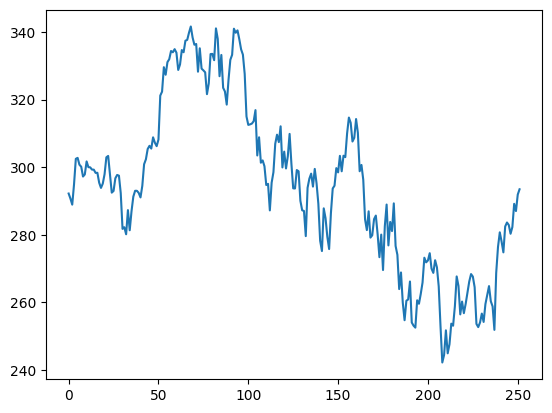

In [ ]:
df['Adj Close'].plot()

In [ ]:
output_var=pd.DataFrame(df['Adj Close'])
features=['Open','High','Low','Volume']

In [ ]:
scaler=MinMaxScaler()
feature_transform=scaler.fit_transform(df[features])
feature_transform=pd.DataFrame(feature_transform,columns=features,index=df.index)
feature_transform.head()

,Open,High,Low,Volume
0,0.489579,0.472241,0.481776,0.102532
1,0.481640,0.458866,0.492303,0.070393
2,0.478166,0.472241,0.484258,0.093354
3,0.444919,0.497739,0.468070,0.199556
4,0.554387,0.578274,0.561625,0.344468


In [ ]:
'''timesplit=TimeSeriesSplit(n_splits=10)
for train_index,test_index in timesplit.split(feature_transform):
  X_train,X_test=feature_transform.iloc[train_index],feature_transform.iloc[test_index]
  y_train,y_test=output_var.iloc[train_index],output_var.iloc[test_index]

In [ ]:
timesplit= TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()
        print(X_train.shape), print(X_test.shape)
        print(y_train.shape), print(y_test.shape)

(32, 4)
(22, 4)
(32,)
(22,)
(54, 4)
(22, 4)
(54,)
(22,)
(76, 4)
(22, 4)
(76,)
(22,)
(98, 4)
(22, 4)
(98,)
(22,)
(120, 4)
(22, 4)
(120,)
(22,)
(142, 4)
(22, 4)
(142,)
(22,)
(164, 4)
(22, 4)
(164,)
(22,)
(186, 4)
(22, 4)
(186,)
(22,)
(208, 4)
(22, 4)
(208,)
(22,)
(230, 4)
(22, 4)
(230,)
(22,)


In [ ]:
trainX=np.array(X_train)
testX=np.array(X_test)
X_train=trainX.reshape(trainX.shape[0],1,trainX.shape[1])
X_test=testX.reshape(testX.shape[0],1, testX.shape[1])

In [ ]:
import ma

Building the LSTM MODEL


In [ ]:
import matplotlib.pyplot as plt
lstm=Sequential()
lstm.add(LSTM(32,input_shape=(1,trainX.shape[1]),activation='relu',return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error',optimizer='adam')
plot_model(lstm,show_shapes=True,show_layer_names=True)

NameError: name 'plot_model' is not defined

In [ ]:
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
plot_model=(lstm, show_shapes=True, show_layer_names=True)

SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (<ipython-input-30-5f52b8c53581>, line 5)

In [ ]:
!pip install pydot
!apt-get install graphviz


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [ ]:
!pip install --upgrade tensorflow


In [ ]:
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')

# Plot the model architecture
plot_model(lstm, show_shapes=True, show_layer_names=True)

NameError: name 'plot_model' is not defined

In [ ]:
history=lstm.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1, shuffle=False)


Epoch 1/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 92788.9219
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 92730.1875
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 92649.5391
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 92528.0312
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 92351.8203
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 92104.3281
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 91770.0859
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 91335.2578
Epoch 9/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 90789.0312
Epoch 10/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 90124.3906
Epoch 11/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 89338.3516
Epoch 12/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 88431.6719
Epoch 13/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 87408.2969
Epoch 14/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 86274.4688
Epoch 15/100
29

In [ ]:
#LSTM Prediction
y_pred= lstm.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


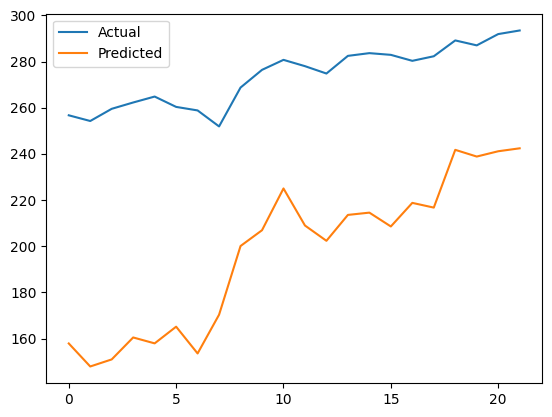

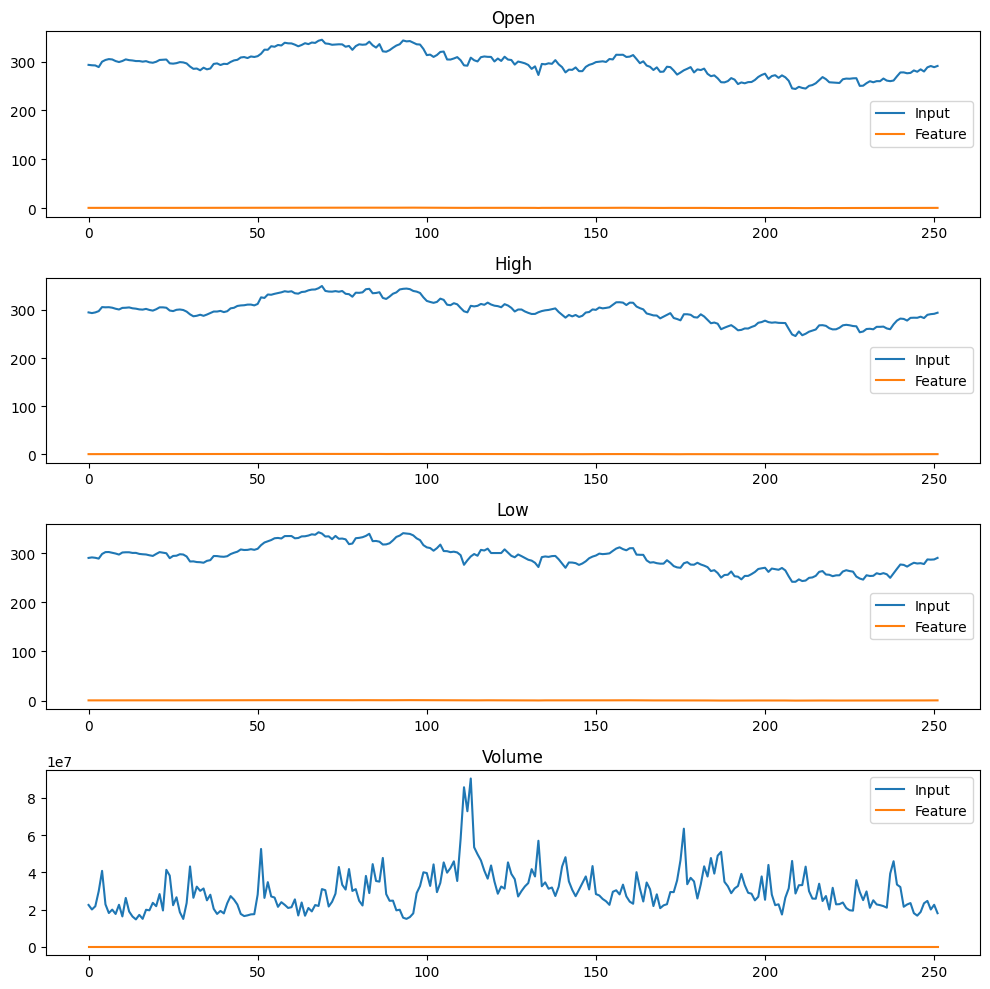

In [ ]:
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()
fig, axes = plt.subplots(len(features), 1, figsize=(10, 10))
for i, feature in enumerate(features):
    axes[i].plot(df[feature], label='Input')
    axes[i].plot(feature_transform[feature], label='Feature')
    axes[i].set_title(feature)
    axes[i].legend()
plt.tight_layout()
plt.show()


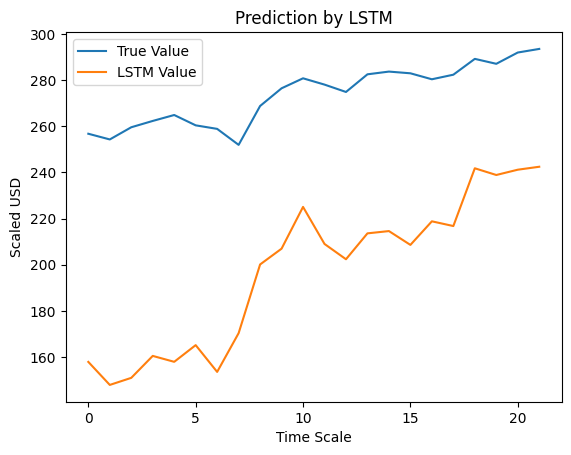

In [ ]:
#Predicted vs True Adj Close Value – LSTM
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title("Prediction by LSTM")
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()